<a href="https://colab.research.google.com/github/leoleeiamai/ai-finance-portfolio/blob/main/Pandas_FTSE_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Week 1 — Day 3: Pandas for FTSE Data


In [ ]:
!pip -q install yfinance pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.rcParams['figure.figsize'] = (10,4)


In [ ]:
tickers= ["HSBA.L","BP.L","AZN.L","VOD.L","LLOY.L"]
raw = yf.download (tickers, start = "2016-01-01",auto_adjust=True)

raw.head()

[*********************100%***********************]  5 of 5 completed


Price             Close                                                 \
Ticker            AZN.L        BP.L      HSBA.L     LLOY.L       VOD.L   
Date                                                                     
2016-01-04  4464.343750  345.580597  517.611389  71.067566  214.634308   
2016-01-05  4548.086426  346.177094  519.799255  71.266701  218.310898   
2016-01-06  4508.707031  341.503815  505.576019  70.699104  217.764404   
2016-01-07  4367.639648  335.786346  499.309784  69.195503  216.820358   
2016-01-08  4335.736328  326.837463  496.425262  68.578140  221.639725   

Price              High                                                 ...  \
Ticker            AZN.L        BP.L      HSBA.L     LLOY.L       VOD.L  ...   
Date                                                                    ...   
2016-01-04  4554.069283  351.447189  527.159922  72.322221  218.682554  ...   
2016-01-05  4563.040678  350.502449  522.962267  72.093185  220.000146  ...   
2016-01-06  4559.551489  350.024258  518.433746  71.226857  219.354294  ...   
2016-01-07  4524.160859  337.476695  506.037543  71.097412  217.814035  ...   
2016-01-08  4461.648020  337.788060  507.764162  70.380467  224.322650  ...   

Price              Open                                                 \
Ticker            AZN.L        BP.L      HSBA.L     LLOY.L       VOD.L   
Date                                                                     
2016-01-04  4551.078432  349.259643  525.170639  71.904003  218.112179   
2016-01-05  4507.211471  347.022283  520.396076  71.993610  218.609004   
2016-01-06  4542.104861  348.414414  516.417631  71.196985  218.360617   
2016-01-07  4432.939899  335.090301  500.403895  69.404612  213.690281   
2016-01-08  4410.507592  337.775133  502.094697  69.534071  218.559319   

Price        Volume                                             
Ticker        AZN.L        BP.L    HSBA.L     LLOY.L     VOD.L  
Date                                                            
2016-01-04  2243185  30115031.0  23664136  131789192  73377483  
2016-01-05  2333997  23383274.0  18505161  133545553  54065200  
2016-01-06  1975341  28972711.0  40640974  128433516  56716589  
2016-01-07  3841926  59009866.0  51224409  215183324  95420191  
2016-01-08  2210583  38890589.0  29190845  128699010  90441040  

[5 rows x 25 columns]

In [ ]:
# If multi-index columns, pick just 'Close' level and flatten
if isinstance(raw.columns, pd.MultiIndex):
    close = raw['Close'].copy()
else:
    close = raw[['Close']].copy()

close = close.dropna(how='all')           # drop rows where all tickers are NaN
close.head()
close.describe()


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
count,2475.000000,2474.000000,2475.000000,2475.000000,2475.000000
mean,8041.173877,432.454259,598.390266,54.312796,136.298697
std,2649.506993,85.831284,144.945044,12.351158,53.041998
min,3763.641602,192.950943,282.529297,23.925354,62.903542
25%,5359.801270,366.369202,480.317307,45.363028,87.389637
50%,8122.959961,452.280548,612.068665,54.942242,127.044525
75%,10540.025391,492.887154,677.560303,63.812838,187.036552
max,13273.173828,595.998474,1066.000000,86.379997,238.264603


In [ ]:
print("Close prices (head):")
display(close.head())

print("Close price summary:")
display(close.describe())


Close prices (head):


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2016-01-04,4464.343750,345.580597,517.611389,71.067566,214.634308
2016-01-05,4548.086426,346.177094,519.799255,71.266701,218.310898
2016-01-06,4508.707031,341.503815,505.576019,70.699104,217.764404
2016-01-07,4367.639648,335.786346,499.309784,69.195503,216.820358
2016-01-08,4335.736328,326.837463,496.425262,68.578140,221.639725


Close price summary:


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
count,2475.000000,2474.000000,2475.000000,2475.000000,2475.000000
mean,8041.173877,432.454259,598.390266,54.312796,136.298697
std,2649.506993,85.831284,144.945044,12.351158,53.041998
min,3763.641602,192.950943,282.529297,23.925354,62.903542
25%,5359.801270,366.369202,480.317307,45.363028,87.389637
50%,8122.959961,452.280548,612.068665,54.942242,127.044525
75%,10540.025391,492.887154,677.560303,63.812838,187.036552
max,13273.173828,595.998474,1066.000000,86.379997,238.264603


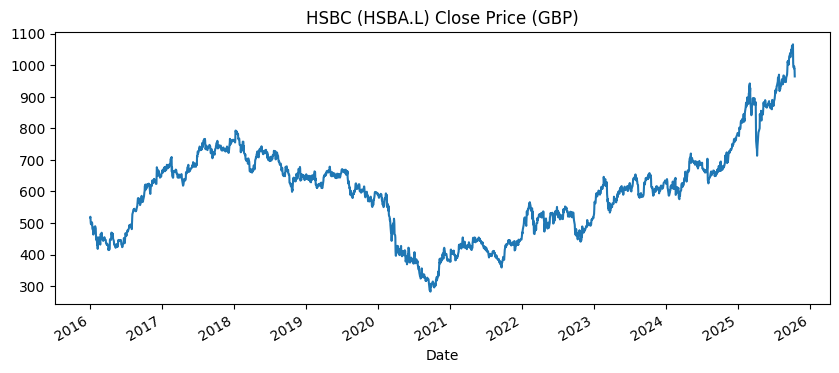

In [ ]:
close['HSBA.L'].plot(title='HSBC (HSBA.L) Close Price (GBP)')
plt.show()


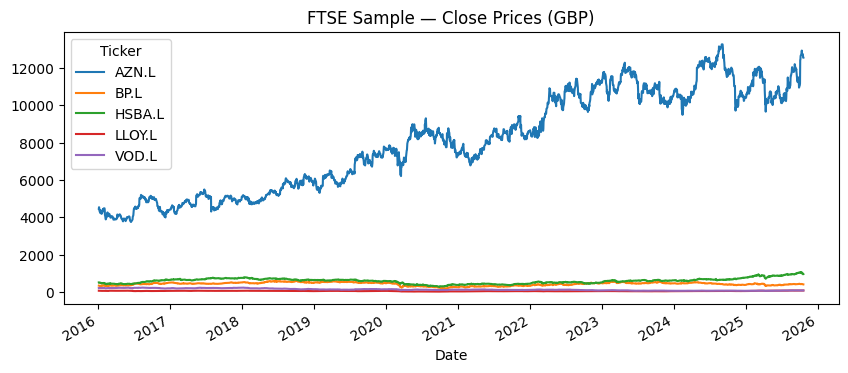

In [ ]:
close.plot(title='FTSE Sample — Close Prices (GBP)')
plt.show()


/tmp/ipython-input-898705018.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = close.pct_change().dropna()


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2016-01-05,0.018758,0.001726,0.004227,0.002802,0.017130
2016-01-06,-0.008658,-0.013500,-0.027363,-0.007964,-0.002503
2016-01-07,-0.031288,-0.016742,-0.012394,-0.021268,-0.004335
2016-01-08,-0.007304,-0.026651,-0.005777,-0.008922,0.022227
2016-01-11,-0.021499,-0.001978,-0.002605,0.000871,-0.010087


,AnnReturn,AnnVol
Ticker,,
AZN.L,0.135736,0.246065
HSBA.L,0.094759,0.250279
BP.L,0.065797,0.310086
LLOY.L,0.063884,0.311346
VOD.L,-0.059245,0.255852


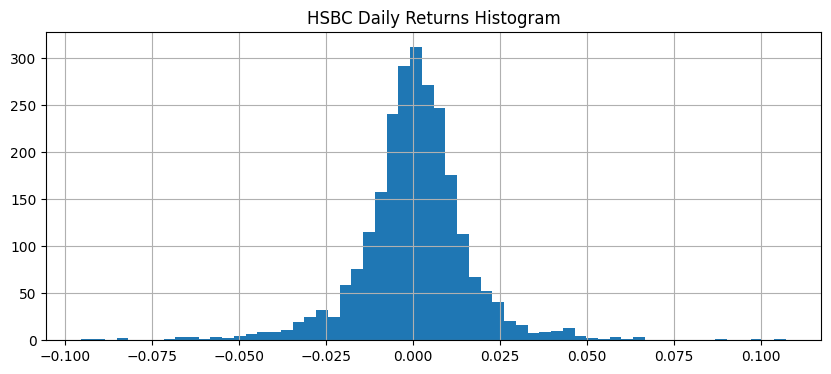

In [ ]:
rets = close.pct_change().dropna()
display(rets.head())

# Annualized stats (approx. 252 trading days)
ann_ret = rets.mean() * 252
ann_vol = rets.std() * np.sqrt(252)
summary = pd.DataFrame({'AnnReturn': ann_ret, 'AnnVol': ann_vol}).sort_values('AnnReturn', ascending=False)
display(summary)

# Plot distributions (example for HSBC)
rets['HSBA.L'].hist(bins=60)
plt.title('HSBC Daily Returns Histogram')
plt.show()


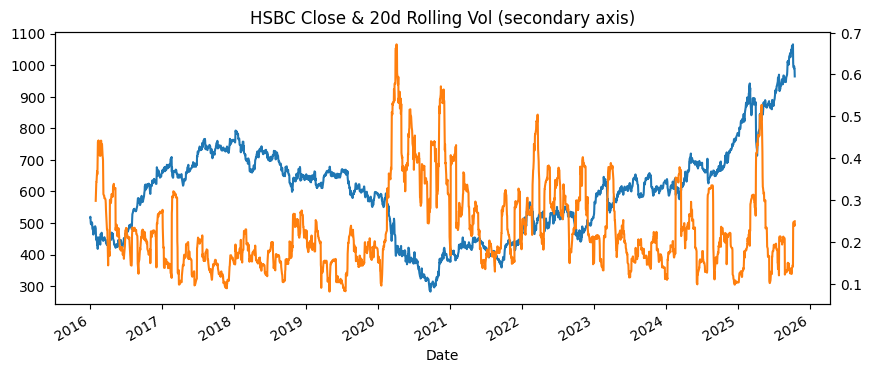

In [ ]:
hsbc = close['HSBA.L'].to_frame()
hsbc['Return'] = hsbc['HSBA.L'].pct_change()
hsbc['Rolling20dVol'] = hsbc['Return'].rolling(20).std() * np.sqrt(252)

ax = hsbc['HSBA.L'].plot(title='HSBC Close & 20d Rolling Vol (secondary axis)')
hsbc['Rolling20dVol'].plot(ax=ax, secondary_y=True)
plt.show()


In [ ]:
assert close.index.is_monotonic_increasing, "Index not sorted by date."
assert close.notna().any().any(), "No valid data downloaded."
# If a ticker is all-NaN, drop it:
valid_cols = close.columns[close.notna().any()]
close = close[valid_cols]


In [ ]:
close.resample('M').last()

/tmp/ipython-input-762364962.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  close.resample('M').last()


Ticker,AZN.L,BP.L,HSBA.L,LLOY.L,VOD.L
Date,,,,,
2016-01-31,4473.814453,373.968872,489.661804,65.182587,222.484329
2016-02-29,4095.729248,349.532806,457.186707,72.093185,218.310898
2016-03-31,3891.789551,348.239868,431.710175,67.731743,219.801407
2016-04-30,3917.218750,371.711182,450.216278,66.805389,217.814072
2016-05-31,4016.945068,355.368896,442.880524,71.735863,229.390427
...,...,...,...,...,...
2025-06-30,10119.297852,365.645874,881.732056,76.688103,77.779999
2025-07-31,11323.213867,404.690063,922.728943,77.800003,82.019997
2025-08-31,11790.000000,432.100006,946.700012,79.519997,88.360001
